In [84]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [85]:
# Sets the number of examples.
M = 100

# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

# Create target function and its noisy version.
x = np.linspace(-3, 3, M).reshape(M, 1)
y = x + 0.5*x**2;
y_noisy = y + np.random.randn(M, 1)

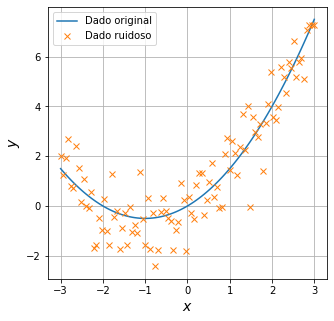

In [86]:
# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

In [167]:
# Polynomial order.
model_order = 20

# Concatenate both column vectors.
X = x
for i in range(2, model_order+1):
    X = np.c_[X, np.power(x, i)]
    
scaler = StandardScaler()
X = scaler.fit_transform(X)

I = np.eye(model_order)

# Closed-form solution.
lambdaf = 0.0
a_opt = np.linalg.inv(np.transpose(X).dot(X) + I.dot(lambdaf)).dot(np.transpose(X).dot(y_noisy))

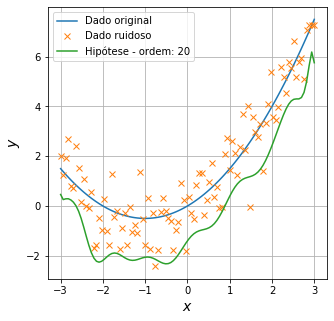

In [168]:
# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso') 
plt.plot(x, X.dot(a_opt), label='Hipótese - ordem: '+str(model_order))
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

In [132]:
# Sets the number of examples.
M = 100

# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

# Create target function and its noisy version.
x = np.linspace(-3, 3, M).reshape(M, 1)
y = x + 0.5*x**2;
y_noisy = y + np.random.randn(M, 1)

In [133]:
# Polynomial order.
model_order = 20

# Concatenate both column vectors.
X = x
for i in range(2, model_order+1):
    X = np.c_[X, np.power(x, i)]
    
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [163]:
# Batch gradient descent solution.

# learning rate.
alpha = 0.01
# Regularization term.
lambdaf = 0.0
# Maximum number of iterations.
n_iterations = 5000

# Random initialization of parameters.
a = np.zeros((model_order,1))
for i in range(0,model_order): a[i] = 1
    
grad_hist = np.zeros((model_order, n_iterations))

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(y_noisy - X.dot(a), 2))

# Batch gradient-descent loop.
iteration = 0
error = 1
#while iteration < n_iterations and error > 0.001:
while iteration < n_iterations:
    #a_aux = np.zeros((model_order, 1))
    #for i in range(1, model_order+1): a_aux[i] = a[i]
    reg_term = a*(2*lambdaf)
    gradients = -2/M*X.T.dot(y_noisy - X.dot(a)) + reg_term
    a = a - alpha * gradients
    Jgd[iteration+1] = (1/M)*sum(np.power((y_noisy - X.dot(a)), 2))
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    for i in range(0,model_order): grad_hist[i, iteration] = gradients[i]
    iteration = iteration + 1

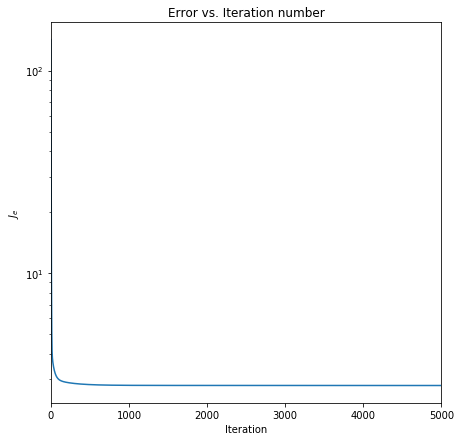

In [164]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

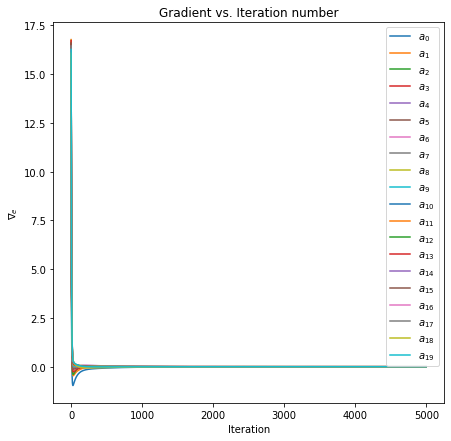

In [165]:
fig = plt.figure(figsize=(7,7))

for i in range(0, model_order):
    strr = '$a_{'+str(i)+'}$'
    plt.plot(np.arange(0, iteration), grad_hist[i,0:iteration], label=strr)
plt.xlabel('Iteration')
plt.ylabel('$\\nabla_e$')
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.show()

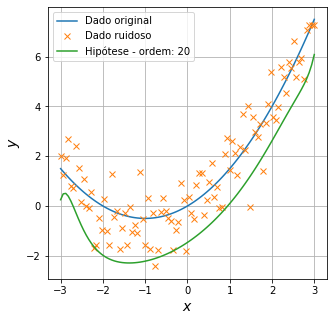

In [166]:
# Plot original data versus noisy version.
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso') 
plt.plot(x, X.dot(a), label='Hipótese - ordem: '+str(model_order))
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

In [157]:
# Calculate mean squared error of optimum solution.
yhat = X.dot(a_opt)
Joptimum = (1/M)*np.sum(np.power((y_noisy - yhat), 2) )
print('Erro ótimo: ', Joptimum)

for i in range(0, model_order):
    print('a%d:\t%1.4e' % (i,a_opt[i, 0]))

Erro ótimo:  3.97676971820074
a0:	2.3593e+00
a1:	-2.3015e+00
a2:	-5.6371e+00
a3:	8.5827e+00
a4:	9.5862e+00
a5:	-1.0090e+01
a6:	-7.7190e+00
a7:	6.2362e+00
a8:	3.3881e+00
a9:	-2.2893e+00
a10:	-8.7685e-01
a11:	5.2299e-01
a12:	1.3813e-01
a13:	-7.4831e-02
a14:	-1.3069e-02
a15:	6.5038e-03
a16:	6.8488e-04
a17:	-3.1330e-04
a18:	-1.5320e-05
a19:	6.4049e-06


In [158]:
yhat = X.dot(a)
J = (1/M)*np.sum(np.power((y_noisy - yhat), 2) )
print('Erro: ', J)

for i in range(0, model_order):
    print('a%d:\t%1.4e' % (i,a[i, 0]))

Erro:  2.929447102820206
a0:	1.2574e+00
a1:	7.2269e-01
a2:	5.2768e-01
a3:	4.2359e-01
a4:	1.8961e-01
a5:	2.4756e-01
a6:	2.6077e-02
a7:	1.3436e-01
a8:	-5.1178e-02
a9:	5.8289e-02
a10:	-8.2592e-02
a11:	6.4885e-03
a12:	-8.8920e-02
a13:	-2.8613e-02
a14:	-8.1524e-02
a15:	-5.1933e-02
a16:	-6.6836e-02
a17:	-6.6822e-02
a18:	-4.8556e-02
a19:	-7.5627e-02
